In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

In [4]:
pulsar = pd.read_csv('Desktop/HTRU2/HTRU_2.csv')

In [5]:
pulsar.head()


,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
df = pulsar.drop('class_labels' , 1)

In [7]:
df.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [8]:
clf = IsolationForest()

In [9]:
clf.fit(df)

/home/ari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/ari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [10]:
scores = clf.decision_function(df)

In [11]:
scores

array([ 0.08996193,  0.07990888,  0.11332084, ...,  0.00804624,
        0.12527476, -0.18531984])

In [12]:
pulsar['scores'] = scores

In [13]:
pulsar.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,0.089962
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,0.079909
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,0.113321
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,0.094994
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,0.059601


In [14]:
pulsar[pulsar['class_labels'] == 1]

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1,-0.008925
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1,0.114527
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1,-0.136467
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1,-0.179832
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1,0.025424
100,123.468750,45.475085,0.345781,0.647415,32.919732,65.094197,1.605538,0.871364,1,0.027902
110,35.156250,30.237714,4.203475,24.486691,34.101171,62.577395,1.890020,2.572133,1,-0.097947
132,18.117188,29.297670,6.446706,44.601588,50.107860,66.321825,1.456423,1.335182,1,-0.160166
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913,1,-0.148220
146,26.921875,34.511006,4.709838,24.247400,183.622910,79.932815,-1.326647,0.346712,1,-0.173184


In [15]:
pulsar[pulsar['class_labels'] == 0]

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,0.089962
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,0.079909
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,0.113321
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,0.094994
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,0.059601
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0,0.105548
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0,0.005763
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0,0.074847
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0,0.123159
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0,0.107455


In [16]:
pulsar[pulsar['scores'] < 0]

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1,-0.008925
54,136.187500,51.952916,-0.070432,-0.482220,0.849498,9.677531,18.736554,431.390445,0,-0.007652
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1,-0.136467
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1,-0.179832
110,35.156250,30.237714,4.203475,24.486691,34.101171,62.577395,1.890020,2.572133,1,-0.097947
132,18.117188,29.297670,6.446706,44.601588,50.107860,66.321825,1.456423,1.335182,1,-0.160166
134,126.398438,60.418248,0.048077,-0.814893,66.547659,85.322761,0.750702,-1.037197,0,-0.034817
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913,1,-0.148220
146,26.921875,34.511006,4.709838,24.247400,183.622910,79.932815,-1.326647,0.346712,1,-0.173184
178,48.242188,36.492025,2.935560,10.888746,41.504181,62.897811,1.472489,1.305269,1,-0.055107


In [17]:
df2 = pulsar[pulsar['scores']<0]

In [18]:
df2[df2["class_labels"]==1]

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM-SNR_curve,Standard_deviation_of_the_DM-SNR_curve,Excess_kurtosis_of_the_DM-SNR_curve,Skewness_of_the_DM-SNR_curve,class_labels,scores
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1,-0.008925
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1,-0.136467
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1,-0.179832
110,35.156250,30.237714,4.203475,24.486691,34.101171,62.577395,1.890020,2.572133,1,-0.097947
132,18.117188,29.297670,6.446706,44.601588,50.107860,66.321825,1.456423,1.335182,1,-0.160166
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913,1,-0.148220
146,26.921875,34.511006,4.709838,24.247400,183.622910,79.932815,-1.326647,0.346712,1,-0.173184
178,48.242188,36.492025,2.935560,10.888746,41.504181,62.897811,1.472489,1.305269,1,-0.055107
227,11.820312,37.258270,5.340502,28.655975,146.725752,75.399449,-0.290785,-1.219307,1,-0.169745
238,59.429688,45.392504,2.175947,5.660025,16.459030,47.319477,3.084529,8.940259,1,-0.013282


In [19]:
1312/2581

0.508330104610616

In [20]:
import matplotlib.pyplot as plt

(array([  47.,  190.,  429.,  534.,  576.,  722., 1046., 2104., 5216.,
        7034.]),
 array([-0.22319544, -0.18595884, -0.14872223, -0.11148563, -0.07424903,
        -0.03701243,  0.00022417,  0.03746077,  0.07469737,  0.11193397,
         0.14917057]),
 <a list of 10 Patch objects>)

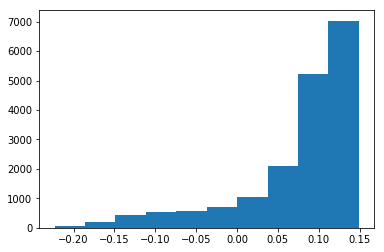

In [21]:
plt.hist(pulsar['scores'])